# Synthetic Dataset Types for Kernel Intuition

This notebook generates six different types of synthetic datasets to explore the behavior of Additive Gaussian Process (Additive GP) and Orthogonal Additive Kernel (OAK) models. Each dataset is saved in binary MATLAB `.mat` format.

In [2]:
import numpy as np
import scipy.io
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure data directory exists
os.makedirs("data", exist_ok=True)

# Function to plot dataset
def plot_synthetic_data(X, title, feature_names):
    plt.figure(figsize=(12, 6))
    for i in range(1, X.shape[1]):  # Skip the first column (y)
        plt.subplot(2, (X.shape[1] - 1) // 2 + 1, i)
        plt.scatter(X[:, i], X[:, 0], alpha=0.5, label=f"{feature_names[i-1]} vs y")
        plt.xlabel(feature_names[i - 1])
        plt.ylabel("y")
        plt.grid(True)
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

In [53]:
myextrlst = np.zeros(5)
myextrlst

array([0., 0., 0., 0., 0.])

## **0. Used for testing formats and interactions**

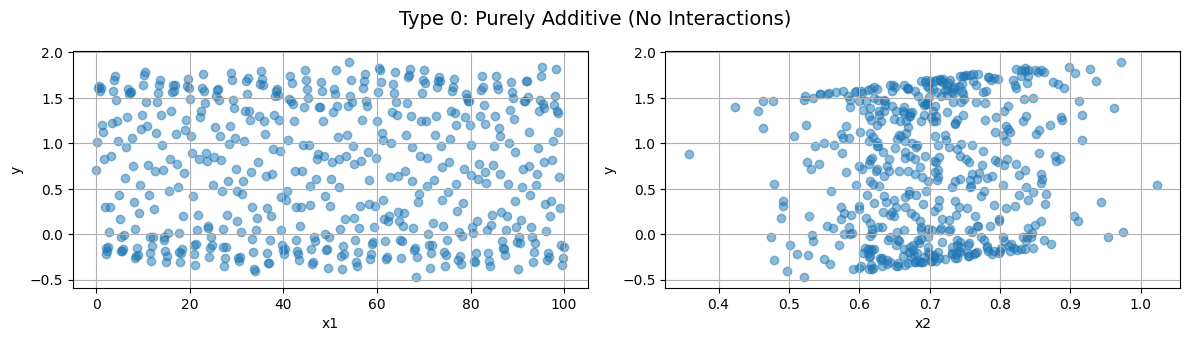

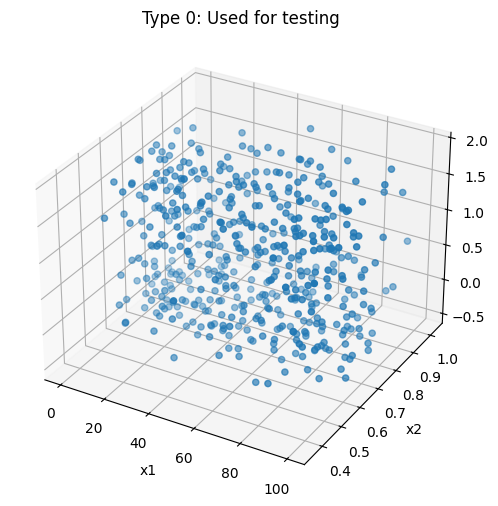

In [51]:
import numpy as np
import scipy.io

# Generate x_i values
x_1 = np.arange(0, 100.2, 0.2)
x_2 = np.random.normal(loc=0.7, scale=0.1, size=len(x_1))


# Generate y values
y = np.sin(2 * x_1) + x_2

# Create X matrix (features)
X = np.column_stack((y, x_1, x_2))  # Stack features as a 2D matrix, as is expected in `load_regression_dataset``

# Save as a MATLAB binary file (v5 format)
scipy.io.savemat("data/synthetic_behaviour_type0.mat", {"X": X})
plot_synthetic_data(X, "Type 0: Purely Additive (No Interactions)", ["x1", "x2", "x3"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 0: Used for testing")
plt.show()




In [43]:
print("Feature standard deviations:", np.std(X, axis=0)) # note that having a feature of 0 std causes nan errors as std = 0 and normalising divides by std


Feature standard deviations: [ 0.71354152 28.92519087  0.09718393]




## **1. Purely Additive Function (No Interactions)**
- **Formula:** $y = f_1(x_1) + f_2(x_2) + f_3(x_3) + \epsilon$
- **Expected Behavior:** Both OAK and Additive GP should perform similarly since there are no interaction terms.

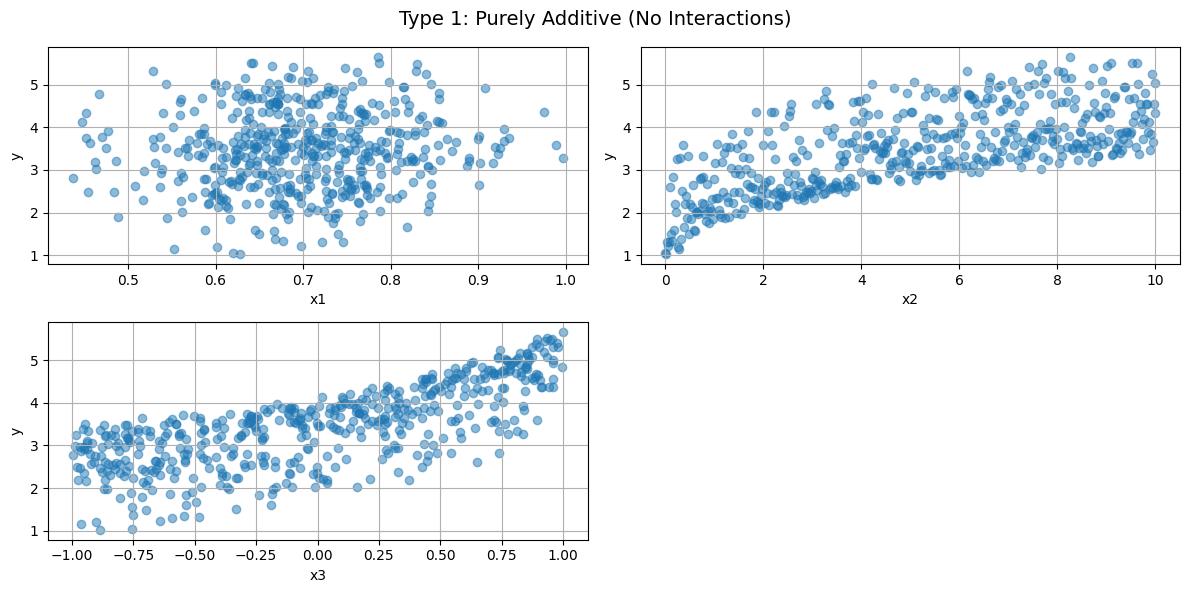

In [44]:
# --- 1. Purely Additive Function (No Interactions) ---
x_1 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_2 = np.linspace(0, 10, len(x_1))
x_3 = np.random.uniform(-1, 1, size=len(x_1))

y = np.sin(x_1) + np.log(1 + x_2) + np.exp(x_3)

X = np.column_stack((y, x_1, x_2, x_3))
scipy.io.savemat("data/synthetic_behaviour_type1.mat", {"X": X})

plot_synthetic_data(X, "Type 1: Purely Additive (No Interactions)", ["x1", "x2", "x3"])


## **2. Strong Interaction Between Features**
- **Formula:** $y = x_1 \cdot x_2$
- **Expected Behavior:** As there is only an interaction term, both capture the interaction only.

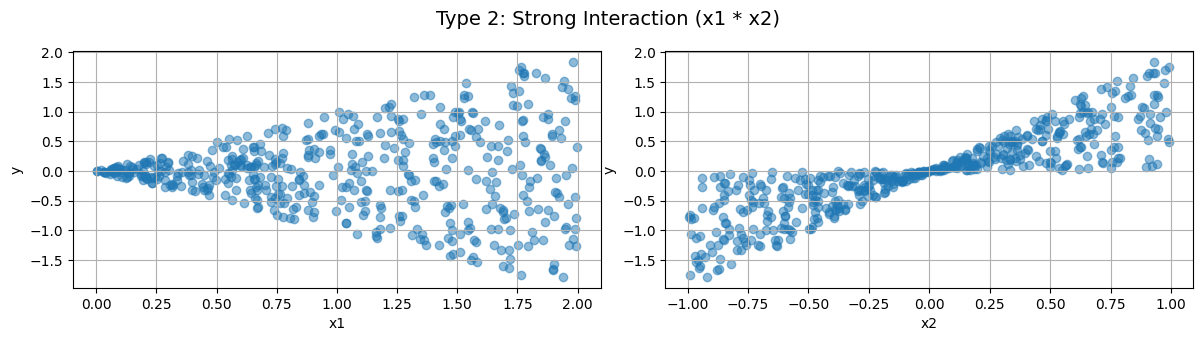

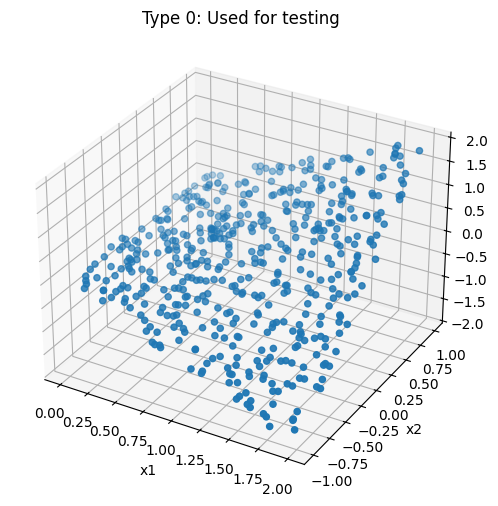

In [54]:
# --- 2. Strong Interaction Between Features ---
x_1 = np.random.uniform(0, 2, 500)
x_2 = np.random.uniform(-1, 1, 500)

y = x_1 * x_2  # Strong interaction term

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type2.mat", {"X": X})

plot_synthetic_data(X, "Type 2: Strong Interaction (x1 * x2)", ["x1", "x2"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 0: Used for testing")
plt.show()

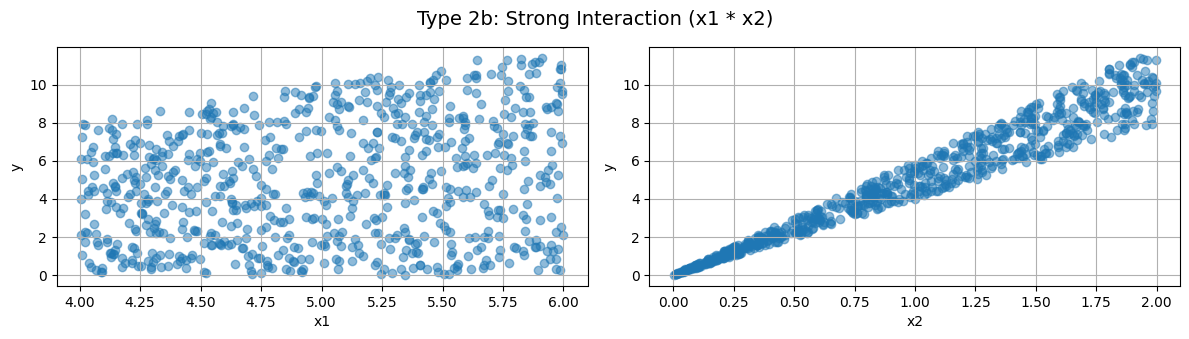

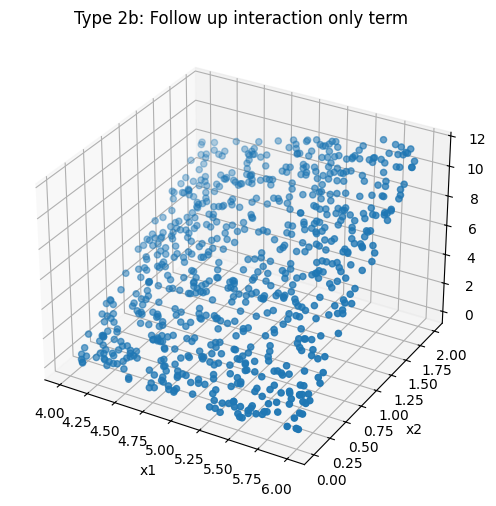

In [7]:
# --- 2. Strong Interaction Between Features follow up with more datapoints and no negative side ---
x_1 = np.random.uniform(4, 6, 750)
x_2 = np.random.uniform(0, 2, 750)

y = x_1 * x_2  # Strong interaction term

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type2b.mat", {"X": X})

plot_synthetic_data(X, "Type 2b: Strong Interaction (x1 * x2)", ["x1", "x2"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 2b: Follow up interaction only term")
plt.show()

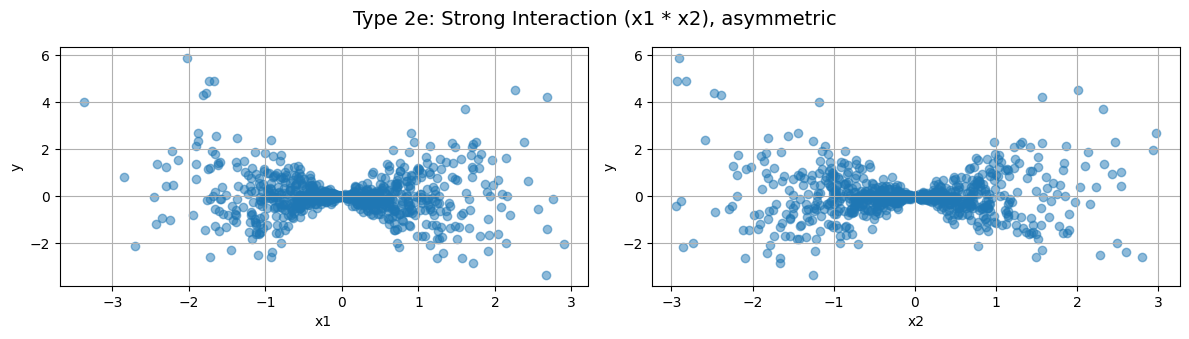

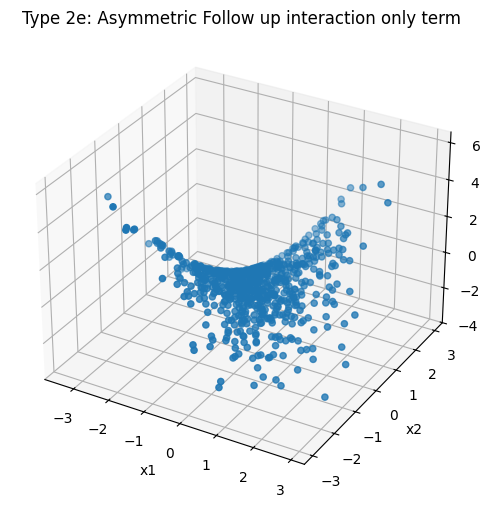

In [6]:
# --- 2e. suspect that type 2 results may be to do with symmetry and 0 mean constraints, so we try and use asymetric functions ---
# x_1 = np.random.uniform(0, 2, 500)
x_1 = np.random.normal(loc=0, scale=1, size=750)
x_2 = np.random.normal(loc=0., scale=1, size=750)


y = x_1 * x_2  # Strong interaction term

X = np.column_stack((y, x_1, x_2))
scipy.io.savemat("data/synthetic_behaviour_type2e.mat", {"X": X})

plot_synthetic_data(X, "Type 2e: Strong Interaction (x1 * x2), asymmetric", ["x1", "x2"])

# plot 3d scatter plot of the data
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 1], X[:, 2], X[:, 0])
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.title("Type 2e: Asymmetric Follow up interaction only term")
plt.show()

## **3. Sparse Dependency on Features**
- **Formula:** $y = \sin(x_1) + \log(1 + x_3) + \epsilon$
- **Expected Behavior:** OAK should assign high importance to \( x_1 \) and \( x_3 \) while ignoring other irrelevant features.

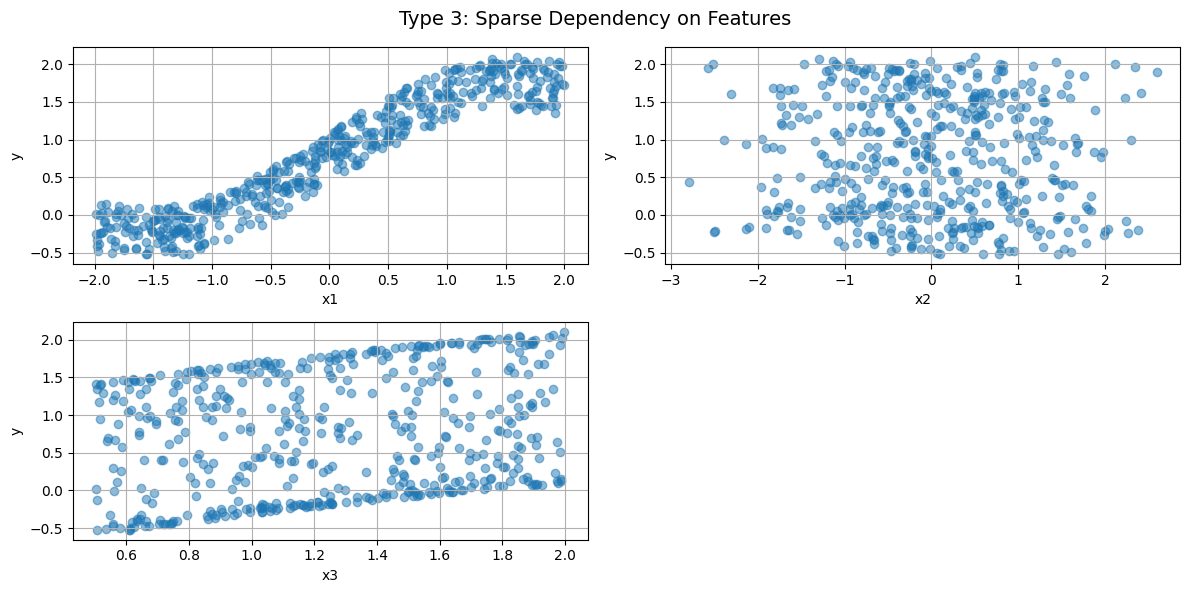

In [46]:
# --- 3. Sparse Dependency on Features ---
x_1 = np.random.uniform(-2, 2, 500)
x_2 = np.random.normal(0, 1, 500)
x_3 = np.random.uniform(0.5, 2, 500)

y = np.sin(x_1) + np.log(1 + x_3)  # Only depends on x_1 and x_3

X = np.column_stack((y, x_1, x_2, x_3))
scipy.io.savemat("data/synthetic_behaviour_type3.mat", {"X": X})

plot_synthetic_data(X, "Type 3: Sparse Dependency on Features", ["x1", "x2", "x3"])



## **4. Low-Dimensional Interactions with High-Dimensional Input**
- **Formula:** $y = f(x_1, x_2) + f(x_3), \quad f(x_1, x_2) = \sin(x_1) \cos(x_2)$
- **Expected Behavior:** OAK should correctly identify and separate lower-order interactions.

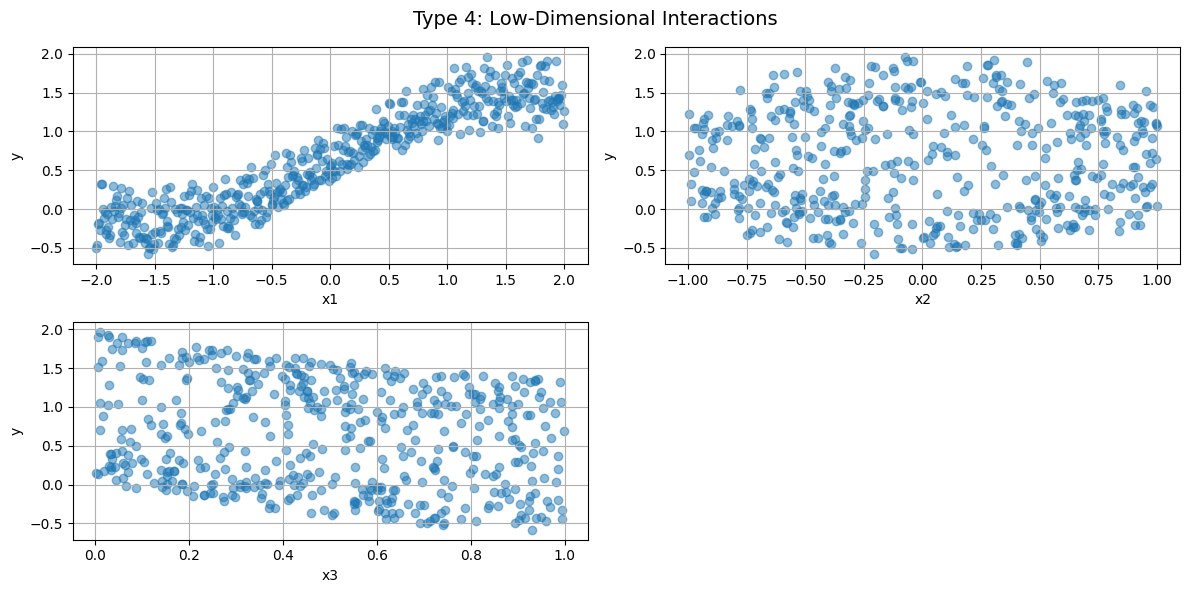

In [47]:
# --- 4. Low-Dimensional Interactions with High-Dimensional Input ---
x_1 = np.linspace(-2, 2, 500)
x_2 = np.random.uniform(-1, 1, 500)
x_3 = np.random.uniform(0, 1, 500)

y = np.sin(x_1) * np.cos(x_2) + np.exp(-x_3)

X = np.column_stack((y, x_1, x_2, x_3))
scipy.io.savemat("data/synthetic_behaviour_type4.mat", {"X": X})

plot_synthetic_data(X, "Type 4: Low-Dimensional Interactions", ["x1", "x2", "x3"])



## **5. Mixed Additive and Interaction Terms**
- **Formula:** $y = x_1^2 + x_2^2 + x_3 x_4 + \epsilon$
- **Expected Behavior:** OAK should separate additive terms from interactions, while Additive GP may mix them.

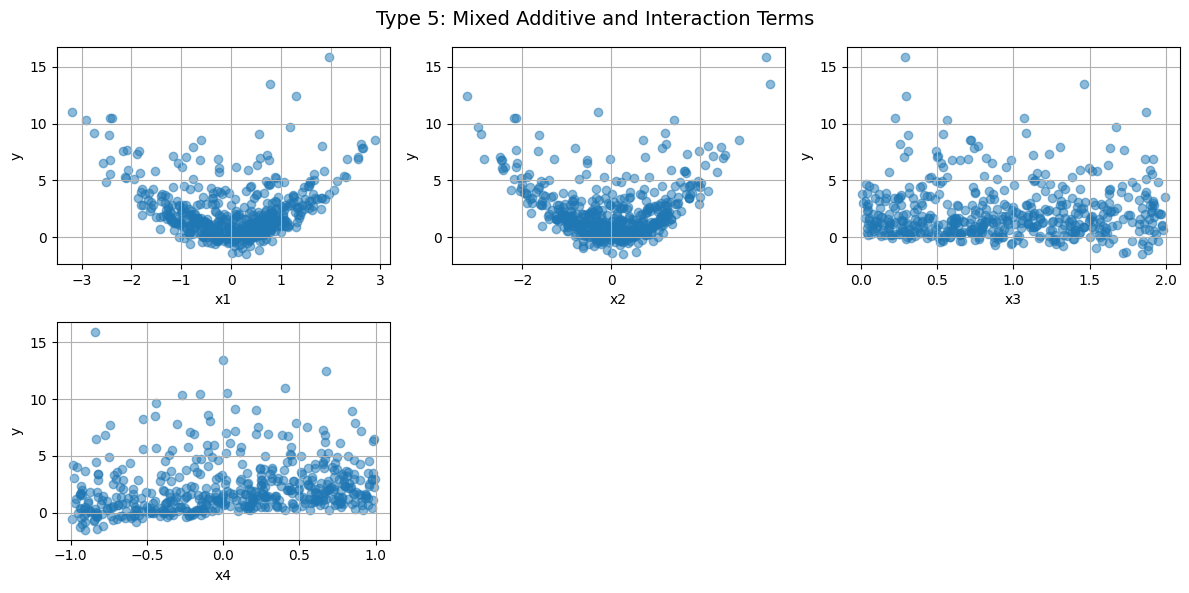

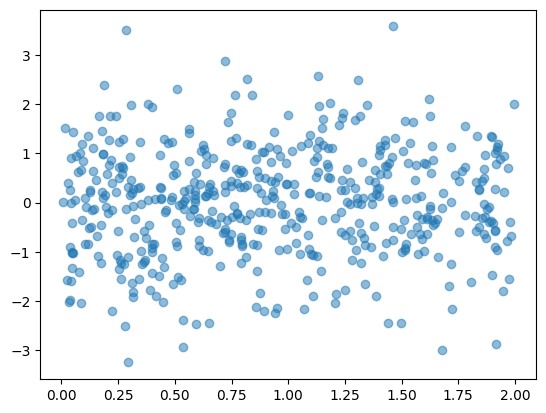

In [3]:
# --- 5. Mixed Additive and Interaction Terms ---
x_1 = np.random.normal(0, 1, 500)
x_2 = np.random.normal(0, 1, 500)
x_3 = np.random.uniform(0, 2, 500)
x_4 = np.random.uniform(-1, 1, 500)

y = x_1**2 + x_2**2 + x_3 * x_4  # Mix of additive and interaction terms

X = np.column_stack((y, x_1, x_2, x_3, x_4))
# scipy.io.savemat("data/synthetic_behaviour_type5.mat", {"X": X})

plot_synthetic_data(X, "Type 5: Mixed Additive and Interaction Terms", ["x1", "x2", "x3", "x4"])

#plotting x3 against x4
plt.scatter(X[:, 3], X[:, 2], alpha=0.5, label=f"x3 vs x4")









## **6. High-Dimensional Redundant Features**
- **Formula:** \( y = \sin(x_1) + x_2^2 + 0.1 \times \sum_{i=3}^{10} x_i + \epsilon \)
- **Expected Behavior:** OAK should ignore the redundant features, while Additive GP may struggle.


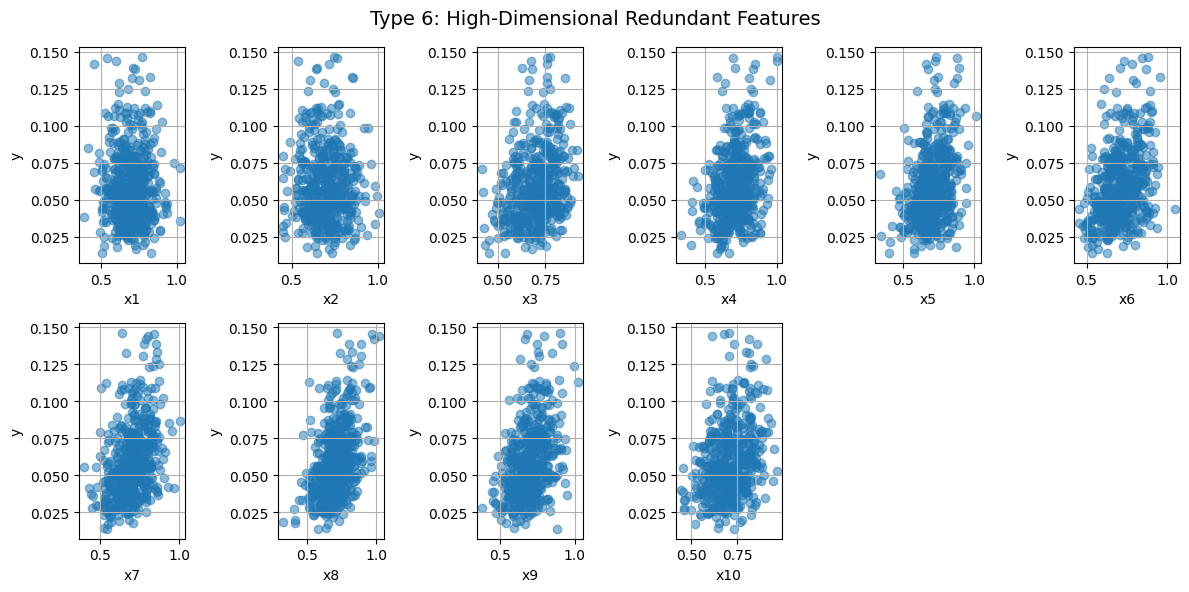

In [12]:
# --- 6. High-Dimensional Redundant Features ---
x_1 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_2 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_3 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_4 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_5 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_6 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_7 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_8 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_9 = np.random.normal(loc=0.7, scale=0.1, size=500)
x_10 = np.random.normal(loc=0.7, scale=0.1, size=500)

y = (x_3 * x_4 * x_5 * x_6 * x_7 * x_8 * x_9 * x_10)

X = np.column_stack((y, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10))
scipy.io.savemat("data/synthetic_behaviour_type6.mat", {"X": X})

plot_synthetic_data(X, "Type 6: High-Dimensional Redundant Features", ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10"])
